In [3]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt

# Load the dataframe

In [4]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [5]:
pd.set_option("display.max_columns", None)

# Rows, columns, non-null value count, data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

# Let's take a peek

In [37]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


# How many are null?

In [38]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

# How many null by percent

In [39]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

# How many unique values?

In [40]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

# For numeric columns show mean, std, min, max, percentiles

In [41]:
df.describe().apply(lambda s: s.apply("{0:.2f}".format)) # Values in scientific notation by default, reformat

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1516064.00,1516064.00,1516064.00,1516064.00,1516064.00,1516064.00,469969.00,1473031.00,1066748.00,1470555.00,1479790.00,1471853.00,1387202.00,1005515.00
mean,2.24,36.90,-98.60,36.90,-98.60,0.59,8907.53,59.58,55.11,64.66,29.55,9.13,7.63,0.01
std,0.61,5.17,18.50,5.17,18.50,1.63,22421.90,18.27,21.13,23.26,1.02,2.89,5.64,0.13
min,1.00,24.57,-124.50,24.57,-124.50,0.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.85,-118.21,33.85,-118.21,0.00,1212.00,47.00,40.80,48.00,29.44,10.00,4.60,0.00
50%,2.00,37.35,-94.38,37.35,-94.38,0.18,4000.00,61.00,57.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.87,40.73,-80.87,0.59,10100.00,73.00,71.00,84.00,30.04,10.00,10.40,0.00
max,4.00,49.00,-67.11,49.08,-67.11,155.19,9999997.00,170.60,113.00,100.00,58.04,140.00,984.00,24.00


# Drop columns with only one value

In [42]:
df.drop(["Country", "Turning_Loop"], axis = 1, inplace = True)

# Drop columns that aren't useful to us

In [43]:
df.drop(["ID", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Description", "Number", "Street", "City", "County", "Zipcode", "Timezone", "Airport_Code", "Weather_Timestamp"], axis=1, inplace=True)

# Value counts

In [44]:
df.Severity.value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

## Note: Most records are from California and Florida

In [45]:
df.State.value_counts()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

In [46]:
df.Side.value_counts()

R    1294562
L     221502
Name: Side, dtype: int64

In [47]:
df.Wind_Direction.value_counts()

CALM        202870
Calm         79192
WNW          77743
NW           75810
W            72059
SSW          69901
WSW          68504
NNW          68014
S            67543
SW           65626
SSE          65058
SE           54770
N            53718
E            52435
ESE          51295
ENE          51257
NE           48355
NNE          46509
West         40611
South        40596
VAR          39670
North        35568
East         24064
Variable     23038
Name: Wind_Direction, dtype: int64

## Note: Weather_Condition has many values that only appear a few times or once

In [48]:
dict(df.Weather_Condition.value_counts())

{'Fair': 465252,
 'Mostly Cloudy': 193595,
 'Clear': 180223,
 'Cloudy': 161291,
 'Partly Cloudy': 133102,
 'Overcast': 87853,
 'Light Rain': 72511,
 'Scattered Clouds': 47061,
 'Light Snow': 22113,
 'Fog': 19777,
 'Haze': 17706,
 'Rain': 17389,
 'Fair / Windy': 6631,
 'Heavy Rain': 6119,
 'Light Drizzle': 4307,
 'Mostly Cloudy / Windy': 3612,
 'Smoke': 3608,
 'Cloudy / Windy': 3300,
 'Snow': 2730,
 'Partly Cloudy / Windy': 2125,
 'Light Rain / Windy': 1845,
 'T-Storm': 1516,
 'Thunder in the Vicinity': 1275,
 'Wintry Mix': 1251,
 'Light Rain with Thunder': 1148,
 'Light Thunderstorms and Rain': 1130,
 'Light Snow / Windy': 1090,
 'Thunder': 1083,
 'Thunderstorm': 1037,
 'Drizzle': 1023,
 'Heavy Snow': 771,
 'Heavy T-Storm': 723,
 'Mist': 719,
 'Light Freezing Rain': 706,
 'Patches of Fog': 640,
 'Shallow Fog': 541,
 'Thunderstorms and Rain': 526,
 'Heavy Thunderstorms and Rain': 523,
 'Rain / Windy': 488,
 'N/A Precipitation': 403,
 'Light Freezing Fog': 395,
 'Heavy Rain / Windy': 307

In [49]:
print(df.Amenity.value_counts())
print()
print(df.Bump.value_counts())
print()
print(df.Crossing.value_counts())
print()
print(df.Give_Way.value_counts())
print()
print(df.Junction.value_counts())
print()
print(df.No_Exit.value_counts())
print()
print(df.Railway.value_counts())
print()
print(df.Roundabout.value_counts())
print()
print(df.Station.value_counts())
print()
print(df.Stop.value_counts())
print()
print(df.Traffic_Calming.value_counts())
print()
print(df.Traffic_Signal.value_counts())
print()
print(df.Sunrise_Sunset.value_counts())
print()
print(df.Civil_Twilight.value_counts())
print()
print(df.Nautical_Twilight.value_counts())
print()
print(df.Astronomical_Twilight.value_counts())

False    1503661
True       12403
Name: Amenity, dtype: int64

False    1515803
True         261
Name: Bump, dtype: int64

False    1429681
True       86383
Name: Crossing, dtype: int64

False    1512809
True        3255
Name: Give_Way, dtype: int64

False    1311566
True      204498
Name: Junction, dtype: int64

False    1514335
True        1729
Name: No_Exit, dtype: int64

False    1503480
True       12584
Name: Railway, dtype: int64

False    1516013
True          51
Name: Roundabout, dtype: int64

False    1487917
True       28147
Name: Station, dtype: int64

False    1498368
True       17696
Name: Stop, dtype: int64

False    1515575
True         489
Name: Traffic_Calming, dtype: int64

False    1346095
True      169969
Name: Traffic_Signal, dtype: int64

Day      909838
Night    606143
Name: Sunrise_Sunset, dtype: int64

Day      969075
Night    546906
Name: Civil_Twilight, dtype: int64

Day      1035103
Night     480878
Name: Nautical_Twilight, dtype: int64

Day      1090946
Nig

# Wind_Direction has some values spelled in multiple ways, let's fix that

In [7]:
df.Wind_Direction.value_counts()

CALM        202870
Calm         79192
WNW          77743
NW           75810
W            72059
SSW          69901
WSW          68504
NNW          68014
S            67543
SW           65626
SSE          65058
SE           54770
N            53718
E            52435
ESE          51295
ENE          51257
NE           48355
NNE          46509
West         40611
South        40596
VAR          39670
North        35568
East         24064
Variable     23038
Name: Wind_Direction, dtype: int64

In [199]:
df.Wind_Direction.replace("CALM", "Calm", inplace=True)
df.Wind_Direction.replace("VAR", "Variable", inplace=True)
df.Wind_Direction.replace("N", "North", inplace=True)
df.Wind_Direction.replace("E", "East", inplace=True)
df.Wind_Direction.replace("S", "South", inplace=True)
df.Wind_Direction.replace("W", "West", inplace=True)
df.Wind_Direction.value_counts()

Calm        282062
West        112670
South       108139
North        89286
WNW          77743
East         76499
NW           75810
SSW          69901
WSW          68504
NNW          68014
SW           65626
SSE          65058
Variable     62708
SE           54770
ESE          51295
ENE          51257
NE           48355
NNE          46509
Name: Wind_Direction, dtype: int64

# Let's take a new look at the data

In [51]:
df.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Distance(mi)                  0
Side                          0
State                         0
Temperature(F)            43033
Wind_Chill(F)            449316
Humidity(%)               45509
Pressure(in)              36274
Visibility(mi)            44211
Wind_Direction            41858
Wind_Speed(mph)          128862
Precipitation(in)        510549
Weather_Condition         44007
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Sunrise_Sunset               83
Civil_Twilight               83
Nautical_Twilight            83
Astronomical_Twilight        83
dtype: i

In [52]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Astronomical_Twilight     0.005475
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
No_Exit                   0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station                   0.000000
Roundabout                0.000000
Railway                   0.000000
Severity                  0.000000
Junction                  0.000000
Give_Way                  0.000000
Crossing                  0.000000
Bump                      0.000000
Start_Time                0.000000
State                     0.000000
Side                      0.000000
Distance(mi)        

In [53]:
df.nunique()

Severity                       4
Start_Time               1037092
End_Time                 1161415
Distance(mi)               11514
Side                           2
State                         49
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                22
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Roundabout                     2
Station                        2
Stop                           2
Traffic_Calming                2
Traffic_Signal                 2
Sunrise_Sunset                 2
Civil_Twilight                 2
Nautical_Twilight              2
Astronomic

In [54]:
df.describe().apply(lambda s: s.apply("{0:.2f}".format)) # Values in scientific notation by default, reformat

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1516064.00,1516064.00,1473031.00,1066748.00,1470555.00,1479790.00,1471853.00,1387202.00,1005515.00
mean,2.24,0.59,59.58,55.11,64.66,29.55,9.13,7.63,0.01
std,0.61,1.63,18.27,21.13,23.26,1.02,2.89,5.64,0.13
min,1.00,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,0.00,47.00,40.80,48.00,29.44,10.00,4.60,0.00
50%,2.00,0.18,61.00,57.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,0.59,73.00,71.00,84.00,30.04,10.00,10.40,0.00
max,4.00,155.19,170.60,113.00,100.00,58.04,140.00,984.00,24.00


# Let's add a column that specifies the month of the year, day of the week (Monday, Tuesday...), and hour of the day(0-23)

## First let's convert the time strings to time objects

In [8]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], infer_datetime_format=True)
df["End_Time"] = pd.to_datetime(df["End_Time"], infer_datetime_format=True)

In [9]:
df["Month_Of_Year"] = df["Start_Time"].apply(lambda t: t.month)

In [10]:
df["Day_Of_Week"] = df["Start_Time"].apply(lambda t: t.weekday())

In [11]:
df["Hour_Of_Day"] = df["Start_Time"].apply(lambda t: t.hour)

# Let's impute Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight
## The possible values are "Day" and "Night", and they are set depending on their respective definitions of day and night. The time ranges will depend on the location.

## And calculate the time range that's defined as "day"

In [59]:
suns_sunr_min_times = {}
suns_sunr_max_times = {}

civ_twi_min_times = {}
civ_twi_max_times = {}

naut_twi_min_times = {}
naut_twi_max_times = {}

ast_twi_min_times = {}
ast_twi_max_times = {}

for i, state in enumerate(df["State"].unique()):
    print(i)
    suns_sunr_min_times[state] = df[df["Sunrise_Sunset"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
    suns_sunr_max_times[state] = df[df["Sunrise_Sunset"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()
    
    civ_twi_min_times[state] = df[df["Civil_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
    civ_twi_max_times[state] = df[df["Civil_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()
    
    naut_twi_min_times[state] = df[df["Nautical_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
    naut_twi_max_times[state] = df[df["Nautical_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()
    
    ast_twi_min_times[state] = df[df["Astronomical_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
    ast_twi_max_times[state] = df[df["Astronomical_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()

0


<ipython-input-59-57f52202868f>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  suns_sunr_min_times[state] = df[df["Sunrise_Sunset"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
<ipython-input-59-57f52202868f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  suns_sunr_max_times[state] = df[df["Sunrise_Sunset"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()
<ipython-input-59-57f52202868f>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  civ_twi_min_times[state] = df[df["Civil_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.min()
<ipython-input-59-57f52202868f>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  civ_twi_max_times[state] = df[df["Civil_Twilight"] == "Day"][df["State"] == state]["Start_Time"].dt.time.max()
<ipython-input-59-57f52202868f>:21: UserWarning: Boolean Series key will be reindexed to match D

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [60]:
def is_day(time, stat, day_def):
    if day_def == "Sunrise_Sunset":
        return time > suns_sunr_min_times[state] and time < suns_sunr_max_times[state]
    elif day_def == "Civil_Twilight":
        return time > civ_twi_min_times[state] and time < civ_twi_max_times[state]
    elif day_def == "Nautical_Twilight":
        return time > naut_twi_min_times[state] and time < naut_twi_max_times[state]
    elif day_def == "Astronomical_Twilight":
        return time > ast_twi_min_times[state] and time < ast_twi_max_times[state]

In [61]:
original = df.copy(deep=True)

## And we impute

In [62]:
for index, row in df[df["Sunrise_Sunset"].isnull()].iterrows():
    time = row["Start_Time"].time()
    state = row["State"]
    
    if is_day(time, state, "Sunrise_Sunset"):
        df.at[index, "Sunrise_Sunset"] = "Day"
    else:
        df.at[index, "Sunrise_Sunset"] = "Night"
    
    if is_day(time, state, "Civil_Twilight"):
         df.at[index, "Civil_Twilight"] = "Day"
    else:
        df.at[index, "Civil_Twilight"] = "Night"
        
    if is_day(time, state, "Nautical_Twilight"):
         df.at[index, "Nautical_Twilight"] = "Day"
    else:
        df.at[index, "Nautical_Twilight"] = "Night"
        
    if is_day(time, state, "Astronomical_Twilight"):
         df.at[index, "Astronomical_Twilight"] = "Day"
    else:
        df.at[index, "Astronomical_Twilight"] = "Night"
    

## And no more null values!

In [63]:
df.isnull().sum()[["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]]

Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

## Finally let's turn them into boolean values

In [65]:
df["Sunrise_Sunset"] = df["Sunrise_Sunset"].apply(lambda x: True if x == "Day" else False)
df["Civil_Twilight"] = df["Civil_Twilight"].apply(lambda x: True if x == "Day" else False)
df["Nautical_Twilight"] = df["Nautical_Twilight"].apply(lambda x: True if x == "Day" else False)
df["Astronomical_Twilight"] = df["Astronomical_Twilight"].apply(lambda x: True if x == "Day" else False)

## Let's also turn side into a boolean variable

In [67]:
df["Side"] = df["Side"].apply(lambda x: True if x == "R" else False)

# Let's take a look at the outliers

## Let's take another look at our data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Severity               1516064 non-null  int64         
 1   Start_Time             1516064 non-null  datetime64[ns]
 2   End_Time               1516064 non-null  datetime64[ns]
 3   Distance(mi)           1516064 non-null  float64       
 4   Side                   1516064 non-null  bool          
 5   State                  1516064 non-null  object        
 6   Temperature(F)         1473031 non-null  float64       
 7   Wind_Chill(F)          1066748 non-null  float64       
 8   Humidity(%)            1470555 non-null  float64       
 9   Pressure(in)           1479790 non-null  float64       
 10  Visibility(mi)         1471853 non-null  float64       
 11  Wind_Direction         1474206 non-null  object        
 12  Wind_Speed(mph)        13872

In [69]:
df_wo_outliers = df.copy(deep=True)

## Let's look at Distance(mi)

In [186]:
df_wo_outliers["Distance(mi)"].describe().apply(lambda s: "{0:.2f}".format(s)) # Two decimal places

count    1511258.00
mean           0.53
std            1.00
min            0.00
25%            0.00
50%            0.18
75%            0.59
max           10.00
Name: Distance(mi), dtype: object

In [70]:
df_wo_outliers["Distance(mi)"].mean()

0.5872617204814575

In [71]:
df_wo_outliers["Distance(mi)"].std()

1.632659225341599

In [72]:
df_wo_outliers["Distance(mi)"].max()

155.186

## The max value is many many standard deviations above the mean, however these extreme values are very uncommon

## Let's omit the very uncommon values, let's say distance > 10

In [73]:
dist_value_counts = dict(df_wo_outliers["Distance(mi)"].apply(lambda x: 0 if x < 0 else round(x/5, 0)*5).value_counts())
{key:dist_value_counts[key] for key in sorted(dist_value_counts.keys())}

{0.0: 1444125,
 5.0: 62565,
 10.0: 6371,
 15.0: 1507,
 20.0: 507,
 25.0: 294,
 30.0: 219,
 35.0: 130,
 40.0: 111,
 45.0: 76,
 50.0: 22,
 55.0: 11,
 60.0: 26,
 65.0: 22,
 70.0: 17,
 75.0: 11,
 80.0: 10,
 85.0: 3,
 90.0: 3,
 95.0: 8,
 100.0: 4,
 105.0: 4,
 110.0: 3,
 115.0: 4,
 130.0: 1,
 140.0: 2,
 145.0: 1,
 150.0: 4,
 155.0: 3}

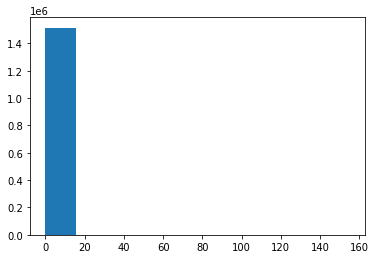

In [74]:
_ = plt.hist(df_wo_outliers["Distance(mi)"])

## The majority of the data is <= 20, let's drop the values that are > 20 (we'll impute them later)

In [75]:
df_wo_outliers.loc[df["Distance(mi)"] > 10, "Distance(mi)"] = np.nan

In [76]:
df_wo_outliers["Distance(mi)"].apply(lambda x: 0 if x < 0 else round(x, 0)).value_counts()

0.0     1068259
1.0      308397
2.0       67469
3.0       30068
4.0       14998
5.0        8331
6.0        5685
7.0        3483
8.0        2319
9.0        1667
10.0        582
Name: Distance(mi), dtype: int64

In [77]:
df_wo_outliers["Distance(mi)"].isnull().sum()

4806

## Let's look at Temperature(F)

In [78]:
df_wo_outliers["Temperature(F)"].mean()

59.584596793957495

In [79]:
df_wo_outliers["Temperature(F)"].std()

18.27316380881708

In [80]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Temperature(F)"].mean() - 3*df_wo_outliers["Temperature(F)"].std()

4.765105367506251

In [81]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Temperature(F)"].mean() + 3*df_wo_outliers["Temperature(F)"].std()

114.40408822040874

In [83]:
temp_value_counts = dict(df_wo_outliers["Temperature(F)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:temp_value_counts[key] for key in sorted(temp_value_counts.keys())}

{-90.0: 2,
 -80.0: 1,
 -60.0: 2,
 -50.0: 2,
 -40.0: 1,
 -30.0: 23,
 -20.0: 160,
 -10.0: 935,
 0.0: 5418,
 10.0: 9559,
 20.0: 38383,
 30.0: 91650,
 40.0: 178378,
 50.0: 228687,
 60.0: 327468,
 70.0: 256393,
 80.0: 240781,
 90.0: 79271,
 100.0: 14697,
 110.0: 1188,
 120.0: 27,
 130.0: 3,
 170.0: 2}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


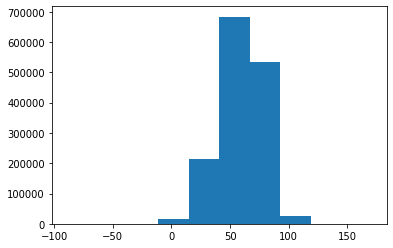

In [84]:
_ = plt.hist(df_wo_outliers["Temperature(F)"])

In [85]:
df_wo_outliers.loc[(df["Temperature(F)"] - df["Temperature(F)"].mean()).abs() > (3*df["Temperature(F)"].std()), "Temperature(F)"] = np.nan

## Let's look at Wind_Chill(F)

In [86]:
df_wo_outliers["Wind_Chill(F)"].mean()

55.10976003704716

In [87]:
df_wo_outliers["Wind_Chill(F)"].std()

21.12734531154636

In [88]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Wind_Chill(F)"].mean() - 3*df_wo_outliers["Wind_Chill(F)"].std()

-8.272275897591918

In [89]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Wind_Chill(F)"].mean() + 3*df_wo_outliers["Wind_Chill(F)"].std()

118.49179597168623

In [90]:
wind_value_counts = dict(df_wo_outliers["Wind_Chill(F)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:wind_value_counts[key] for key in sorted(wind_value_counts.keys())}

{-90.0: 2,
 -80.0: 2,
 -70.0: 1,
 -60.0: 3,
 -50.0: 47,
 -40.0: 83,
 -30.0: 371,
 -20.0: 2754,
 -10.0: 4516,
 0.0: 9442,
 10.0: 22808,
 20.0: 56588,
 30.0: 92129,
 40.0: 149334,
 50.0: 132276,
 60.0: 226808,
 70.0: 166550,
 80.0: 149356,
 90.0: 44322,
 100.0: 8876,
 110.0: 480}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


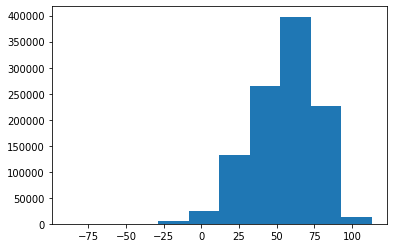

In [91]:
_ = plt.hist(df_wo_outliers["Wind_Chill(F)"])

In [92]:
df_wo_outliers.loc[(df["Wind_Chill(F)"] - df["Wind_Chill(F)"].mean()).abs() > (3*df["Wind_Chill(F)"].std()), "Wind_Chill(F)"] = np.nan

## Let's look at Humidity(%)

In [93]:
df_wo_outliers["Humidity(%)"].mean()

64.65960130698954

In [94]:
df_wo_outliers["Humidity(%)"].std()

23.25986461964904

In [95]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Humidity(%)"].mean() - 3*df_wo_outliers["Humidity(%)"].std()

-5.11999255195758

In [96]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Humidity(%)"].mean() + 3*df_wo_outliers["Humidity(%)"].std()

134.43919516593667

## There are no outliers

In [97]:
humidity_value_counts = dict(df_wo_outliers["Humidity(%)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:humidity_value_counts[key] for key in sorted(humidity_value_counts.keys())}

{0.0: 2315,
 10.0: 29643,
 20.0: 68679,
 30.0: 84690,
 40.0: 142890,
 50.0: 150205,
 60.0: 214252,
 70.0: 190916,
 80.0: 243587,
 90.0: 241680,
 100.0: 101698}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


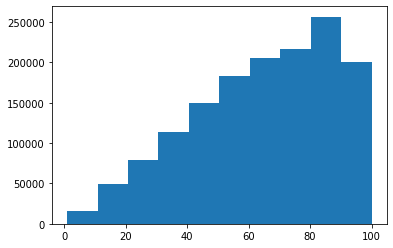

In [98]:
_ = plt.hist(df_wo_outliers["Humidity(%)"])

## Let's look at Pressure(in)

In [99]:
df_wo_outliers["Pressure(in)"].mean()

29.554954405692698

In [100]:
df_wo_outliers["Pressure(in)"].std()

1.0167561753685441

In [101]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Pressure(in)"].mean() - 3*df_wo_outliers["Pressure(in)"].std()

26.504685879587065

In [102]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Pressure(in)"].mean() + 3*df_wo_outliers["Pressure(in)"].std()

32.60522293179833

In [103]:
pressure_value_counts = dict(df_wo_outliers["Pressure(in)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:pressure_value_counts[key] for key in sorted(pressure_value_counts.keys())}

{0.0: 8, 20.0: 16596, 30.0: 1463179, 40.0: 4, 60.0: 3}

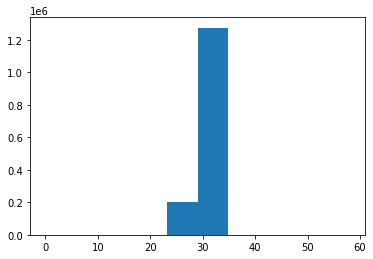

In [104]:
_ = plt.hist(df_wo_outliers["Pressure(in)"])

In [105]:
df_wo_outliers.loc[(df["Pressure(in)"] - df["Pressure(in)"].mean()).abs() > (3*df["Pressure(in)"].std()), "Pressure(in)"] = np.nan

## Let's look at Visibility(mi)

In [106]:
df_wo_outliers["Visibility(mi)"].mean()

9.131755052984236

In [107]:
df_wo_outliers["Visibility(mi)"].std()

2.8891122761548256

In [108]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Visibility(mi)"].mean() - 3*df_wo_outliers["Visibility(mi)"].std()

0.46441822451975945

In [109]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Visibility(mi)"].mean() + 3*df_wo_outliers["Visibility(mi)"].std()

17.79909188144871

In [110]:
visibility_value_counts = dict(df_wo_outliers["Visibility(mi)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:visibility_value_counts[key] for key in sorted(visibility_value_counts.keys())}

{0.0: 147065,
 10.0: 1318891,
 20.0: 2611,
 30.0: 1154,
 40.0: 1004,
 50.0: 815,
 60.0: 80,
 70.0: 92,
 80.0: 120,
 90.0: 5,
 100.0: 7,
 110.0: 2,
 120.0: 5,
 130.0: 1,
 140.0: 1}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


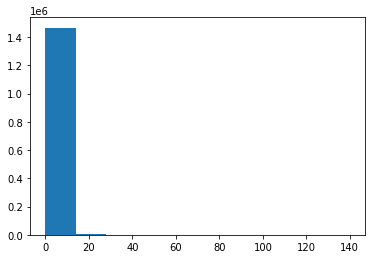

In [111]:
_ = plt.hist(df_wo_outliers["Visibility(mi)"])

In [112]:
df_wo_outliers.loc[(df["Visibility(mi)"] - df["Visibility(mi)"].mean()).abs() > (3*df["Visibility(mi)"].std()), "Visibility(mi)"] = np.nan

## Let's look at Wind_Speed(mph)

In [113]:
df_wo_outliers["Wind_Speed(mph)"].mean()

7.630812455576046

In [114]:
df_wo_outliers["Wind_Speed(mph)"].std()

5.637364271546946

In [115]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Wind_Speed(mph)"].mean() - 3*df_wo_outliers["Wind_Speed(mph)"].std()

-9.281280359064791

In [116]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Wind_Speed(mph)"].mean() + 3*df_wo_outliers["Wind_Speed(mph)"].std()

24.54290527021688

In [117]:
wind_speed_value_counts = dict(df_wo_outliers["Wind_Speed(mph)"].apply(lambda x: round(x/10, 0)*10).value_counts())
{key:wind_speed_value_counts[key] for key in sorted(wind_speed_value_counts.keys())}

{0.0: 489488,
 10.0: 749210,
 20.0: 141374,
 30.0: 6395,
 40.0: 633,
 50.0: 35,
 60.0: 16,
 80.0: 1,
 90.0: 1,
 100.0: 11,
 110.0: 2,
 120.0: 2,
 130.0: 16,
 140.0: 4,
 160.0: 1,
 170.0: 4,
 210.0: 1,
 230.0: 1,
 250.0: 1,
 470.0: 1,
 520.0: 2,
 820.0: 2,
 980.0: 1}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


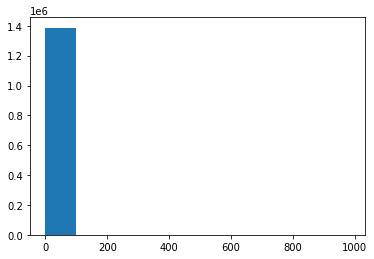

In [118]:
_ = plt.hist(df_wo_outliers["Wind_Speed(mph)"])

In [119]:
df_wo_outliers.loc[(df["Wind_Speed(mph)"] - df["Wind_Speed(mph)"].mean()).abs() > (3*df["Wind_Speed(mph)"].std()), "Wind_Speed(mph)"] = np.nan

## Let's look at Precipitation(in)

In [120]:
df_wo_outliers["Precipitation(in)"].mean()

0.008477854631706142

In [121]:
df_wo_outliers["Precipitation(in)"].std()

0.1293168123914193

In [122]:
# Lower cutoff for outliers (3 SD below mean)
df_wo_outliers["Precipitation(in)"].mean() - 3*df_wo_outliers["Precipitation(in)"].std()

-0.37947258254255173

In [123]:
# Upper cutoff for outliers (3 SD above mean)
df_wo_outliers["Precipitation(in)"].mean() + 3*df_wo_outliers["Precipitation(in)"].std()

0.396428291805964

In [124]:
precipitation_value_counts = dict(df_wo_outliers["Precipitation(in)"].apply(lambda x: round(x, 1)).value_counts())
{key:precipitation_value_counts[key] for key in sorted(precipitation_value_counts.keys())}

{0.0: 964277,
 0.1: 29748,
 0.2: 6296,
 0.3: 2465,
 0.4: 984,
 0.5: 608,
 0.6: 328,
 0.7: 193,
 0.8: 174,
 0.9: 67,
 1.0: 96,
 1.1: 38,
 1.2: 34,
 1.3: 17,
 1.4: 18,
 1.5: 13,
 1.6: 5,
 1.7: 5,
 1.8: 1,
 1.9: 4,
 2.0: 5,
 2.1: 1,
 2.2: 2,
 2.3: 2,
 2.7: 1,
 8.8: 1,
 9.6: 2,
 9.7: 1,
 9.8: 3,
 9.9: 19,
 10.0: 102,
 10.1: 1,
 24.0: 4}

/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luay/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


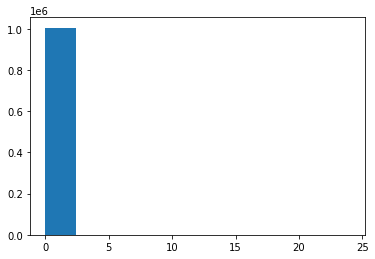

In [125]:
_ = plt.hist(df_wo_outliers["Precipitation(in)"])

In [126]:
df_wo_outliers.loc[(df["Precipitation(in)"] - df["Precipitation(in)"].mean()).abs() > (3*df["Precipitation(in)"].std()), "Precipitation(in)"] = np.nan

# Let's impute the rest

In [129]:
df_tmp = df_wo_outliers.copy(deep=True)
df_tmp.drop(["Start_Time", "End_Time"], axis=1, inplace=True) # Aren't useful for imputation
df_tmp.drop(["State", "Wind_Direction", "Weather_Condition"], axis=1, inplace=True) # Are strings

In [130]:
imputer = IterativeImputer(max_iter=20, random_state=0)
imputed_data = imputer.fit_transform(df_tmp)

/home/luay/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [131]:
df_imputed = pd.DataFrame(imputed_data)
df_imputed.columns = df_tmp.columns

## Restore dropped columns

In [132]:
df_imputed["Start_Time"] = df_wo_outliers["Start_Time"]
df_imputed["End_Time"] = df_wo_outliers["End_Time"]
df_imputed["State"] = df_wo_outliers["State"]
df_imputed["Wind_Direction"] = df_wo_outliers["Wind_Direction"]
df_imputed["Weather_Condition"] = df_wo_outliers["Weather_Condition"]

## Distance is at least 0

In [197]:
df_imputed["Distance(mi)"] = df_imputed["Distance(mi)"].apply(lambda x: 0.0 if x < 0 else x)

## Humidity is a percent so ensure it doesn't exceed 100%

In [191]:
df_imputed["Humidity(%)"] = df_imputed["Humidity(%)"].apply(lambda x: 100.0 if x > 100 else x)

## Precipitation(in) is always >= zero

In [193]:
df_imputed["Precipitation(in)"] = df_imputed["Precipitation(in)"].apply(lambda x: 0.0 if x < 0 else x)

## Visibility is at least 0

In [195]:
df_imputed["Visibility(mi)"] = df_imputed["Visibility(mi)"].apply(lambda x: 0.0 if x < 0 else x)

In [133]:
df_imputed.to_csv("US_Accidents_Dec20_updated_cleaned_imputed_before_imputing_categorical.csv", index=False, header=True)

## Awesome!

In [134]:
df_imputed.isnull().sum()

Severity                     0
Distance(mi)                 0
Side                         0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Speed(mph)              0
Precipitation(in)            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Astronomical_Twilight        0
Month_Of_Year                0
Day_Of_Week                  0
Hour_Of_Day                  0
Start_Time                   0
End_Time                     0
State                        0
Wind_Dir

# Let's impute the categorical values

## First the Weather_Condition column

## The categories were inferred based on a text column that contained keywords. Let's reduce the number of categories by joining keywords that are too similar

In [135]:
df_imputed_original = df_imputed.copy(deep=True)

In [178]:
df_imputed = df_imputed_original.copy(deep=True)

In [13]:
df["Weather_Condition"].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [179]:
light_rain = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Light" in name and "Rain" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Light Rain" if x in light_rain else x)

heavy_rain = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if ("Heavy" in name and "Rain" in name) or name == "Thunderstorm" or name == "Thunderstorms and Rain" or "T-Storm" in name or "Thunder" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Heavy Rain" if x in heavy_rain else x)

rain = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if ("Light" not in name and "Heavy" not in name and "Rain" in name) or "Drizzle" in name or "Precipitation" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Rain" if x in rain else x)

heavy_snow = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Heavy" in name and "Snow" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Heavy Snow" if x in heavy_snow else x)

light_snow = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Light Snow" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Light Snow" if x in light_snow else x)

snow = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Light Snow" != name and "Heavy Snow" != name and "Snow" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Snow" if x in snow else x)

cloudy_windy = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Cloud" in name and "Wind" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Cloudy / Windy" if x in cloudy_windy else x)

partly_cloudy = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Partly Cloudy" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Partly Cloudy" if x in partly_cloudy else x)

mostly_cloudy = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Mostly Cloudy" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Mostly Cloudy" if x in mostly_cloudy else x)

fog = [name for name in dict(df_imputed["Weather_Condition"].value_counts()).keys() if "Fog" in name or "Mist" in name]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: "Fog" if x in fog else x)

## Let's set them to the mode

In [164]:
df_imputed["Severity"].value_counts()

2.0    1212382
3.0     161052
4.0     114452
1.0      28178
Name: Severity, dtype: int64

In [180]:
count_less_than_500_truth_vals = df_imputed.groupby(["Weather_Condition"])["Weather_Condition"].count() < 500
count_less_than_500 = [key for key in count_less_than_500_truth_vals.keys() if count_less_than_500_truth_vals[key]]
weather_condition_mode = df_imputed["Weather_Condition"].mode().iat[0]
df_imputed["Weather_Condition"] = df_imputed["Weather_Condition"].apply(lambda x: weather_condition_mode if x in count_less_than_500 else x)
df_imputed["Weather_Condition"].fillna(weather_condition_mode, inplace=True)

In [181]:
df_imputed["Weather_Condition"].value_counts()

Fair                510269
Mostly Cloudy       193595
Clear               180223
Cloudy              161291
Partly Cloudy       133102
Overcast             87853
Light Rain           77489
Scattered Clouds     47061
Rain                 24097
Light Snow           23218
Fog                  22199
Haze                 17706
Heavy Rain           13324
Cloudy / Windy        9037
Fair / Windy          6631
Smoke                 3608
Snow                  3232
Wintry Mix            1251
Heavy Snow             878
Name: Weather_Condition, dtype: int64

In [154]:
count_less_than_500_truth_vals = df_imputed.groupby(["Weather_Condition"])["Weather_Condition"].count() < 500
count_less_than_500 = [key for key in count_less_than_500_truth_vals.keys() if count_less_than_500_truth_vals[key]]
df_imputed[df_imputed["Weather_Condition"].isin(count_less_than_500)] = df_imputed["Weather_Condition"].mode().iat[0]
df_imputed[df_imputed["Weather_Condition"].isnull()] = df_imputed["Weather_Condition"].mode().iat[0]

# Now the Wind_Direction column

## We'll set them to the mode too

In [182]:
wind_direction_mode = df_imputed["Wind_Direction"].mode().iat[0]
df_imputed["Wind_Direction"].fillna(wind_direction_mode, inplace=True)

# Nice, no more null values!

In [183]:
df_imputed.isnull().sum()

Severity                 0
Distance(mi)             0
Side                     0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Precipitation(in)        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Month_Of_Year            0
Day_Of_Week              0
Hour_Of_Day              0
Start_Time               0
End_Time                 0
State                    0
Wind_Direction           0
Weather_Condition        0
dtype: int64

# Let's load our data (for when running the notebook for not the first time)

In [ ]:
df_imputed = pd.read_csv("US_Accidents_Dec20_updated_cleaned_imputed.csv")

# Let's save our data

In [201]:
df_imputed.to_csv("US_Accidents_Dec20_updated_cleaned_imputed.csv", index=False, header=True)